In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [14]:
#Load dataset into dataframe
df = pd.read_csv('NYPD_Arrest_Data__Year_to_Date_cleaned.csv')

In [15]:

# Select a few columns
selected_columns = ['Age Group', 'Perpetrator Sex', 'Perpetrator Race', 'Offense Level']

# Subset the data
df_subset = df[selected_columns]

# One-hot encode the categorical variables
df_encoded = pd.get_dummies(df_subset, columns=['Age Group', 'Perpetrator Sex', 'Perpetrator Race'])

# Split the dataset into training and testing sets
X = df_encoded.drop(columns=['Offense Level'])
y = df_encoded['Offense Level']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a logistic regression model to the training data
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Calculate the confusion matrix of the model
confusion_mat = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix: \n{confusion_mat}')

# Interpret the model coefficients
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_[0]})
coefficients = coefficients.sort_values(by='Coefficient', ascending=False)
print(coefficients)


Accuracy: 0.5607721009489673
Confusion Matrix: 
[[    0     9     0    87     0]
 [    0  2113     0 13141     0]
 [    0     4     0    52     0]
 [    0  1505     0 16974     0]
 [    0    13     0   139     0]]
                                            Feature  Coefficient
8         Perpetrator Race_ASIAN / PACIFIC ISLANDER     0.198607
12                           Perpetrator Race_WHITE     0.158539
3                                     Age Group_65+     0.071780
0                                   Age Group_18-24     0.067721
1                                   Age Group_25-44    -0.173095
2                                   Age Group_45-64    -0.197395
7   Perpetrator Race_AMERICAN INDIAN/ALASKAN NATIVE    -0.228953
9                            Perpetrator Race_BLACK    -0.230747
11                         Perpetrator Race_UNKNOWN    -0.270475
10                  Perpetrator Race_BLACK HISPANIC    -0.326507
13                  Perpetrator Race_WHITE HISPANIC    -0.350992
5     

/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


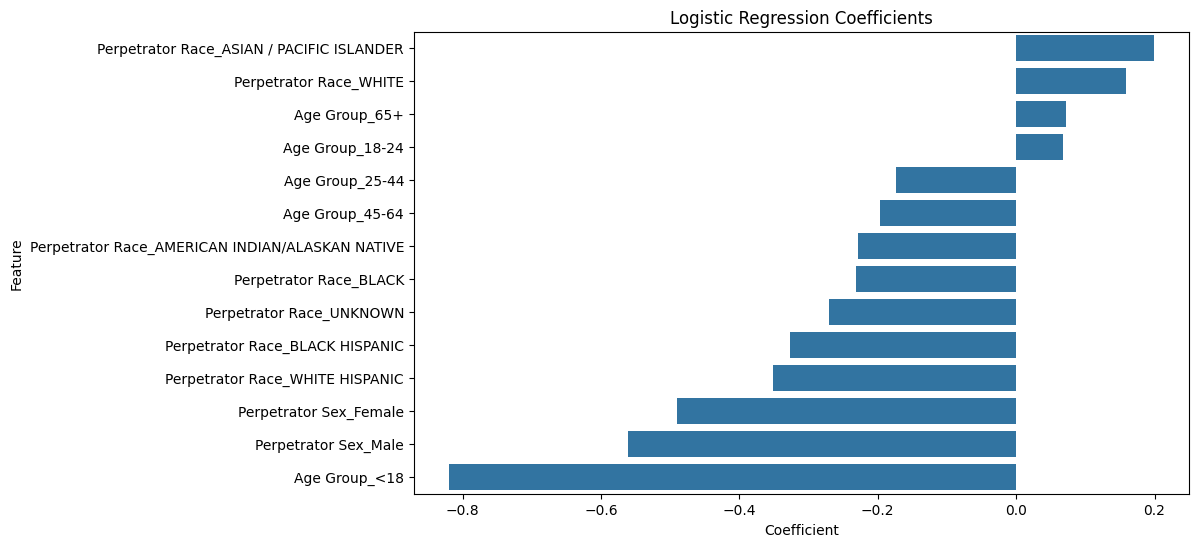

In [16]:
# Create a bar chart of the coefficients
plt.figure(figsize=(10,6))
sns.barplot(x='Coefficient', y='Feature', data=coefficients)
plt.title('Logistic Regression Coefficients')
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.show()